In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Data and images

In [84]:
! pip install gdown
! mkdir -p /content/pic/
! gdown -O /content/pic/part3.tar.gz "1UHrEuOK4IiCDR8UnmAZzv7WKajRihnTJ"
! gdown -O /content/pic/part2.tar.gz "1x5El21VWrTIPNa8VMyAP7xzMYlak0ze-"
! gdown -O /content/pic/part1.tar.gz "1l1I1GVvf5juMSPccqih64D4WiGW2Z6T1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1UHrEuOK4IiCDR8UnmAZzv7WKajRihnTJ
To: /content/pic/part3.tar.gz
100% 57.0M/57.0M [00:00<00:00, 290MB/s]
Downloading...
From: https://drive.google.com/uc?id=1x5El21VWrTIPNa8VMyAP7xzMYlak0ze-
To: /content/pic/part2.tar.gz
100% 459M/459M [00:08<00:00, 54.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1l1I1GVvf5juMSPccqih64D4WiGW2Z6T1
To: /content/pic/part1.tar.gz
100% 874M/874M [00:04<00:00, 202MB/s]


In [85]:
import tarfile
for part in (1,2,3):
  with tarfile.open(f'/content/pic/part{part}.tar.gz', 'r:gz') as tar:
    tar.extractall(path='/content/pic')
! mv /content/pic/part*/* /content/pic/
! rmdir /content/pic/part*

rmdir: failed to remove '/content/pic/part1.tar.gz': Not a directory
rmdir: failed to remove '/content/pic/part2.tar.gz': Not a directory
rmdir: failed to remove '/content/pic/part3': Directory not empty
rmdir: failed to remove '/content/pic/part3.tar.gz': Not a directory


In [86]:
path_to_pictures = '/content/pic/'
path_to_dataset = '/content/drive/MyDrive/Colab Notebooks/CVNLP/dataset_faces.csv'

In [63]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import pandas as pd
import numpy as np
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image
import torch

In [65]:
df = pd.read_csv(path_to_dataset)

In [66]:
df.head()

,filename,age,gender,ethnicity
0,100_1_0_20170110183726390.jpg,100,1,0
1,100_1_2_20170105174847679.jpg,100,1,2
2,100_1_2_20170110182836729.jpg,100,1,2
3,101_1_2_20170105174739309.jpg,101,1,2
4,10_0_0_20161220222308131.jpg,10,0,0


## Get pictures as numpy arrays

In [90]:
# WARNING: This might take long
from tqdm import tqdm
from pathlib import Path
images = []

for idx, image in tqdm(enumerate(df['filename'])):
  path = path_to_pictures + image
  img = Image.open(path)
  img = np.array(img)
  images.append(img)

8178it [01:03, 129.55it/s]


FileNotFoundError: ignored

In [78]:
print(images[0])

[[[231 234 241]
  [234 237 244]
  [233 236 243]
  ...
  [220 225 229]
  [223 227 230]
  [223 227 230]]

 [[222 225 232]
  [226 229 236]
  [231 234 241]
  ...
  [224 229 233]
  [228 232 235]
  [228 232 235]]

 [[222 225 232]
  [221 224 231]
  [226 229 236]
  ...
  [226 231 235]
  [214 217 222]
  [213 216 221]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [80]:
#images[0].show()
images[0].show()

AttributeError: ignored

# Data Augmentation?

Data Augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified data from the existing one.

It is a good technique if you want to prevent overfitting, or the initial dataset is too small to train on, or even if you want to squeeze better performance from your model.

Data Augmentation in computer vision is used to generate new images through different techniques. 

## Data Augmentation techniques
* Geometric transformations: Randomly flip, crop, rotate or translate images.
* Color space transformations: change RGB color channels, intensify any color.
* Kernel filters: sharpen or blur an image.
* Random Erasing: delete a part of the initial image.
* Mixing images: basically, mix images with one another.

All these operations are applicable for classification problems where the location of objects in the image does not matter. In object detection task, where the location of the objects is what we want to detect, these techniques might not be appropriate. 

## Data Augmentation Frameworks:
* TensorFlow
* Keras
* PyTorch


Sources:
* https://neptune.ai/blog/data-augmentation-in-python
* https://pytorch.org/tutorials/beginner/data_loading_tutorial.html?highlight=dataloader
* https://towardsdatascience.com/a-comprehensive-guide-to-image-augmentation-using-pytorch-fb162f2444be
* https://www.youtube.com/watch?v=vo_fUOk-IKk&list=PLWKjhJtqVAbm3T2Eq1_KgloC7ogdXxdRa

## Resize

One issue we can face is that the samples are not of the same size. Most neural networks expect the images of fixed size.


In [ ]:
# Investigate size of the first 5 pictures:
pixels_in_x_axis = []
pixels_in_y_axis = []

for idx, img in enumerate(images):
  img_array = np.array(img)
  pixels_in_x_axis.append(img_array.shape[0])
  pixels_in_y_axis.append(img_array.shape[1])
  if idx < 5: 
    print(f"Image {idx} has shape {img_array.shape}")

In [ ]:
pixels_in_x_axis = pd.Series(pixels_in_x_axis)
pixels_in_y_axis = pd.Series(pixels_in_y_axis)

print(f"Mean size for pictures is ({pixels_in_x_axis.mean()} , {pixels_in_y_axis.mean()})")
print(f"Smaller size for x is {pixels_in_x_axis.min()} pixel and for y {pixels_in_y_axis.min()} pixels.")

In [ ]:
img_size = (64, 64)

In [ ]:
resized_images = []
for img in images:
  resized_img = T.Resize(size=img_size) (img)
  resized_images.append(resized_img)

In [ ]:
# Check sizes
for idx, img in enumerate(resized_images[0:5]):
  img_array = np.array(img)
  print(f"Image {idx} has shape {img_array.shape}")

In [ ]:
print(resized_images[0])

In [ ]:
resized_images[0]

## Normalize Pictures with PyTorch

The normalization can constitute an effective way to speed up the computation in the model based on neural network architecture and learn faster by reducing the skewness. 

There are 2 steps to normalize the images: 


1.   Substract the channel mean from each input channel
2.   Dived it by the channel standard deviation

When we transformed an image into a PyTorch tensor, the pixel values are scaled between 0 and 1. In PyTorch, this transformation is done usint torchvision.transforms.ToTensor(). This converts the PIL image with a pixel range of 0 to 255 to a PyTorch FloatTensor of shape (C, H, W) with a range from 0 to 1. 

**Normalizing the images means transforming the images into such values that the mean and stadard deviation of the image become 0 and 1 respectively.**

To actually normalize the image, then we use torchvision.transforms.Normalize(). 

Normalize() takes 2 parameters: 
* mean: Sequeance of means for each channel. 
* std. Sequence of standard deviations for each channel. 
And it returns a normalized tensor image. 

To normalize the image we first calculate the mean and standard deviation of 10 random pictures. 

In [ ]:
# Transform images to tensor images: 
tensor_images = []
for idx, img in enumerate(resized_images):
  tensor_img = (T.ToTensor())(img) # Transform image to pixel values btw 0 and 1
  tensor_images.append(tensor_img)

In [ ]:
tensor_images[0]

In [ ]:
# Plot pixel values of first image: 
array_img = np.array(tensor_images[0])

plt.hist(array_img.ravel(), bins=50, density=True)
plt.xlabel('pixel values')
plt.ylabel('relative frequency')
plt.title('distribution of pixels for first picture')

In [ ]:
# Calculate mean and standard deviation for 10 random pictures: 
import random
mean_pixels = torch.zeros([3, 10])
std_pixels = torch.zeros([3, 10])

for idx, img in enumerate(random.sample(tensor_images, k=10)):
  mean = img.mean([1,2])
  std = img.std([1,2])
  mean_pixels[:, idx] = mean 
  std_pixels[:, idx] = std

mean = mean_pixels.mean(1)
std = std_pixels.mean(1)

print(f"Mean of 10 random images: {mean}")
print(f"Std of 10 random images: {std}")

In [ ]:
normalized_images_tensor = []
normalized_images = []
# Instanciate Normalize() function with calculated mean and std
normalizer = T.Normalize(mean=list(mean), std=list(std))
for idx, img in enumerate(tensor_images): 
  normalized_img = normalizer(img)
  normalized_images_tensor.append(normalized_img)
  normalized_img = T.ToPILImage()(normalized_img)
  normalized_images.append(normalized_img)

In [ ]:
print(normalized_images[0])

In [ ]:
normalized_images[0]

In [ ]:
print(normalized_images_tensor[0])

# Convolutional neural network


Advantages of CNN: 
* Fewer parameters are necessary to train the model. The kernel is used to calculate the outputs of the entire image, so the model has much fewer parameters compared to a fully connected layer. 
* For classification we do not need to consider all the relations between the feature. 
* Fully connected neural networks are big and therefore computationally inefficient. 
* With CNN the unit share weights (the kernel), which makes the model more eficcient. 
* Sparsity of connections: In each layer, each output element only depends on a small number of input elements, which makes the forward and backward passes more efficient. 
* Parameter sharing and spatial invariance: The features learned by a kernel in one part of the image can be used to detect a similar pattern in a different part of another image. 

Sources: 
* https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
* https://medium.com/analytics-vidhya/image-classification-with-pytorch-184e76c2cf3b

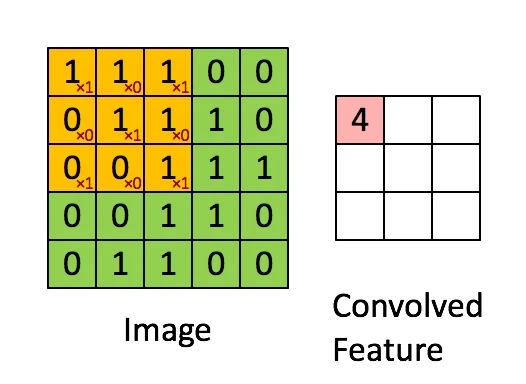

Source: https://giphy.com/gifs/blog-daniel-keypoints-i4NjAwytgIRDW



## 1) Prepare Data

### Get Tensordataset

In [ ]:
# Get target (gender): 
tensor_y = np.array(df['gender'])
tensor_y = torch.from_numpy(tensor_y)

In [ ]:
# Get features (images)
X = normalized_images_tensor
X[0].shape

In [ ]:
# X is a list of tensors. In this cell we transform X from list into a tensor itself. 
tensor_X = torch.zeros(len(X), 3, img_size[0], img_size[1])
for idx, x in enumerate(X):
  tensor_X[idx] = x 

In [ ]:
from torch.utils.data import TensorDataset
tensor_ds = TensorDataset(tensor_X, tensor_y)

In [ ]:
img, label = tensor_ds[4]
print(img.shape, label)

In [ ]:
plt.imshow(img.permute(1, 2, 0))
plt.show()

### Split dataset with PyTorch

In [ ]:
from torch.utils.data import random_split
# Random numbers will be generated always on the same way, so we can compare models. 
random_seed = 42
torch.manual_seed(random_seed)

20% of the images will be used for validate the model. 

In [ ]:
# split dataset with PyTorch
train_size = int(len(tensor_ds) * 0.8)
test_size = int(len(tensor_ds) * 0.2)

train_ds, test_ds = random_split(tensor_ds, [train_size, test_size])
print(len(train_ds))
print(len(test_ds))

In [ ]:
# Load the data
from torch.utils.data import DataLoader
batch_size=5
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_ds, batch_size)

The dataloader allows to split the data into batches of a predifined size while training. The pictures for the dataloader will be randomly selected (shuffle=True)

In [ ]:
# Show a batch of data: 
from torchvision.utils import make_grid

def show_batch(dataloader): 
  for images, labels in dataloader:
    fg, ax = plt.subplots(figsize=(12,6))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break;


In [ ]:
show_batch(train_loader)

## 2) Create Model

In [ ]:
# Define initial number of kernels. 
num_kernels = img_size[0]
num_kernels
X[0].shape

In [ ]:
from torch import nn

class Model(nn.Module): 
  def __init__(self): 
    super().__init__()
    self.network = nn.Sequential(
        nn.Conv2d(3, num_kernels, kernel_size=3, padding=1),
        nn.ReLU(), 
        nn.Conv2d(num_kernels, num_kernels*2, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # Output: 64x16x16
        #MaxPool reduce the size of the image by half (if it was 32x32, becomes 16x16)

        nn.Conv2d(num_kernels*2, num_kernels*4, kernel_size=3, padding=1, stride=1),
        nn.ReLU(), 
        nn.Conv2d(num_kernels*4, num_kernels*4, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # Output: 128x8x8

        nn.Conv2d(num_kernels*4, num_kernels*8, kernel_size=3, stride=1, padding=1),
        nn.ReLU(), 
        nn.Conv2d(num_kernels*8, num_kernels*8, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # Output: 256x4x4

        nn.Flatten(), # 5x32768
        nn.Linear(num_kernels*8 *4*4*4, num_kernels*4), #8192 , 256
        nn.ReLU(),
        nn.Linear(num_kernels*4, num_kernels*2),# 256, 128
        nn.ReLU(),
        nn.Linear(num_kernels*2, 2)) #128, 2
    
  def forward(self, x):
    return self.network(x)

In [ ]:
# Instiate model
model = Model()

## 3) Train the model

In [ ]:
# Initialize the model
model = Model() 
model.train()

# Create Optimizer
optimizer = torch.optim.Adam(model.parameters())

# define loss function
loss_function = nn.CrossEntropyLoss()

# Training
for epoch in range(1): 
  for x, y in train_loader:
    optimizer.zero_grad()
    prediction = model(x)
    loss = loss_function(prediction, y)
    loss.backward()
    optimizer.step()


In [ ]:
def evaluate(loader, name="Training"):
  # Get predictions
  correct, total = 0, 0 
  predictions = []

  model.eval()
  for idx, (x, y) in enumerate(loader):
    output = model(x)
    max_prob, prediction = torch.max(output, 1)
    predictions.append(output)
    total += y.size(0)
    correct += (prediction == y).sum().item()

  accuracy = correct/ total 
  print(f"{name} Accuracy is {accuracy * 100:.2f}%")

evaluate(train_loader)
evaluate(test_loader, "Testing")

In [ ]:
# Source: 
# https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/